# Proyek Analisis Data: [Bike Sharing dataset]
- **Nama:** [Adedio Daniel Situmeang]
- **Email:** [adediodaniel9@gmail.com]
- **ID Dicoding:** [Adedio Daniel S]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  **Bagaimana tren penggunaan sepeda oleh penyewa terdaftar dan penyewa kasual selama periode waktu tertentu?**
- Pertanyaan 2
  **Faktor cuaca dan suhu mana yang berpengaruh terhadap jumlah total penyewa sepeda dan Bagaimana korelasi antara cuaca buruk dan penyewa sepeda?**

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
# Memuat data
data = pd.read_csv('day.csv')

# Mengonversi kolom 'dteday' menjadi format datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Menampilkan beberapa baris data
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari 731 baris dan 14 kolom
- *dteday* menunjukkan tanggal peminjaman, *cnt* menunjukkan jumlah total, *casual* menunjukkan pengguna kasual, dan *registered* menunjukkan pengguna terdaftar...

### Assessing Data

In [4]:
# Mengecek missing value
print(data.isnull().sum())

# Mengecek informasi kolom
data.info()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 1

**Insight:**
- Tidak ada missing value pada dataset yang digunakan
- Semua kolom memiliki tipe data yang sama dengan jenis informasi yang disimpan

### Cleaning Data

In [5]:
# Tidak diperlukan cleaning yang ekstensif karena data sudah bersih.


**Insight:**
- Dataset sudah dalam posisi yang tepat dan bisa dilakukan analisis lebih lanjut

## Exploratory Data Analysis (EDA)




### Explore Pengaruh Cuaca dan hari terhadap Jumlah Penyewaan Sepeda

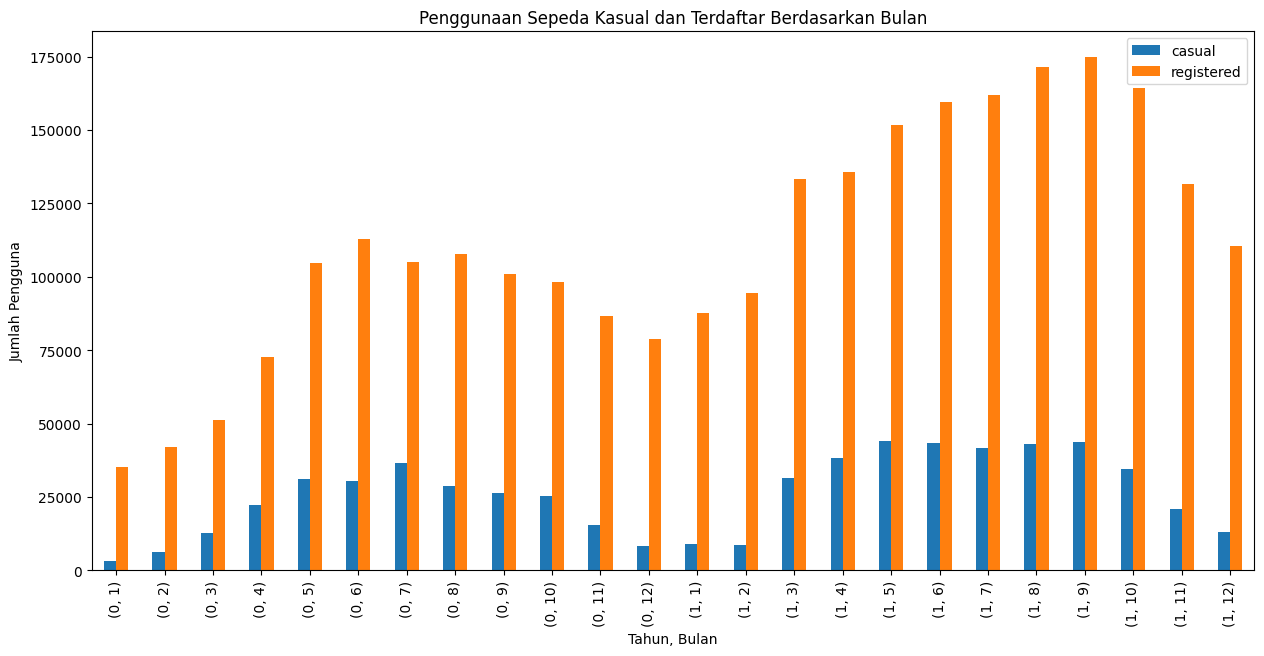

In [6]:
# Mengelompokkan dataset berdasarkan tahun dan bulan
data['month'] = data['dteday'].dt.month
data_grouped = data.groupby(['yr', 'month'])[['casual', 'registered']].sum()

# Membuat plot untuk melihat perbandingan pengguna
data_grouped.plot(kind='bar', figsize=(15, 7))
plt.title('Penggunaan Sepeda Kasual dan Terdaftar Berdasarkan Bulan')
plt.xlabel('Tahun, Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()


**Insight:**
- Pengguna kasual lebih aktif pada bulan tertentu seperti musim panas sedangkan penyewa terdaftar lebih stabil sepanjang tahun
- Puncak peminjaman sepeda terjadi pada pertengahan tahun

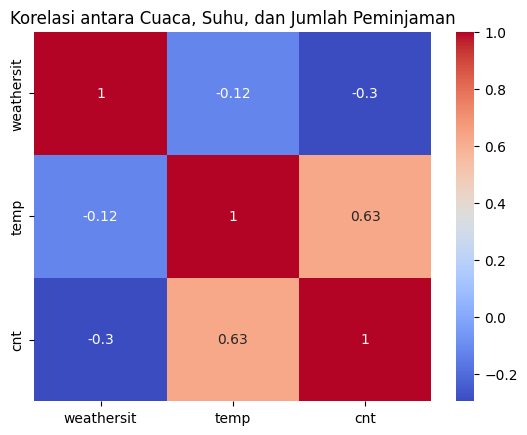

In [7]:
# Melihat hubungan antara variabel cuaca, suhu, dan jumlah peminjaman
correlation = data[['weathersit', 'temp', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca, Suhu, dan Jumlah Peminjaman')
plt.show()


**Insight:**
- Faktor suhu (*temp*) memiliki hubungan positif dengan jumlah peminjaman
- Cuaca buruk (*weathersit*) menunjukkan hubungan negatif dengan peminjaman sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda oleh penyewa terdaftar dan penyewa kasual selama periode waktu tertentu?

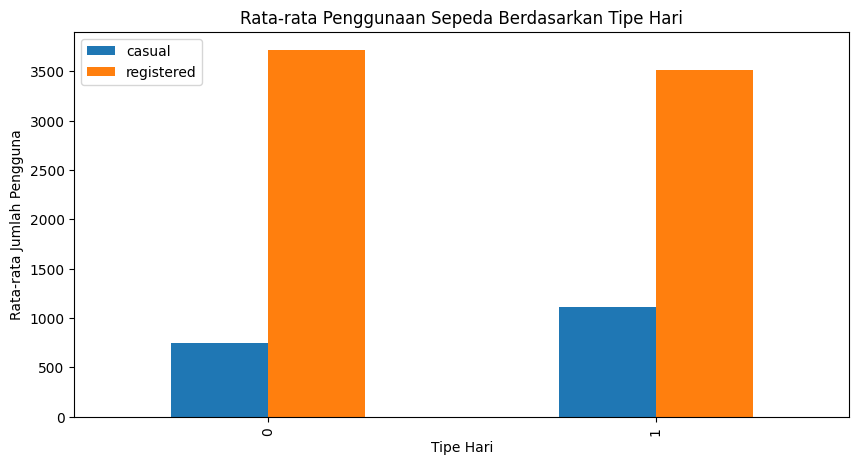

In [10]:
# Menambah kolom 'day_type' untuk membedakan antara hari kerja dan akhir pekan
data['day_type'] = data['weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
day_type_grouped = data.groupby('day_type')[['casual', 'registered']].mean().reset_index()
day_type_grouped.plot(kind='bar', figsize=(10, 5))
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Tipe Hari')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.show()


### Pertanyaan 2: Faktor cuaca dan suhu mana yang berpengaruh terhadap jumlah total penyewa sepeda dan Bagaimana korelasi antara cuaca buruk dan penyewa sepeda?

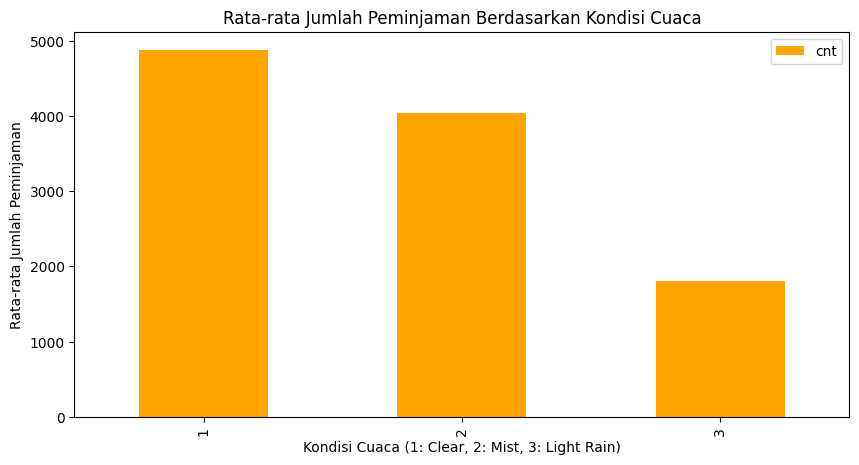

In [11]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_grouped = data.groupby(['weathersit'])[['cnt']].mean()
weather_grouped.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Rata-rata Jumlah Peminjaman Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Rain)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


**Insight:**
- Cuaca buruk seperti hujan ringan (weathersi=3) mengurangi jumlah total peminjaman sepeda
- Pada kondisi cerah (weathersit=1), peminjaman cenderung lebih tinggi

## Analisis Lanjutan (Opsional)

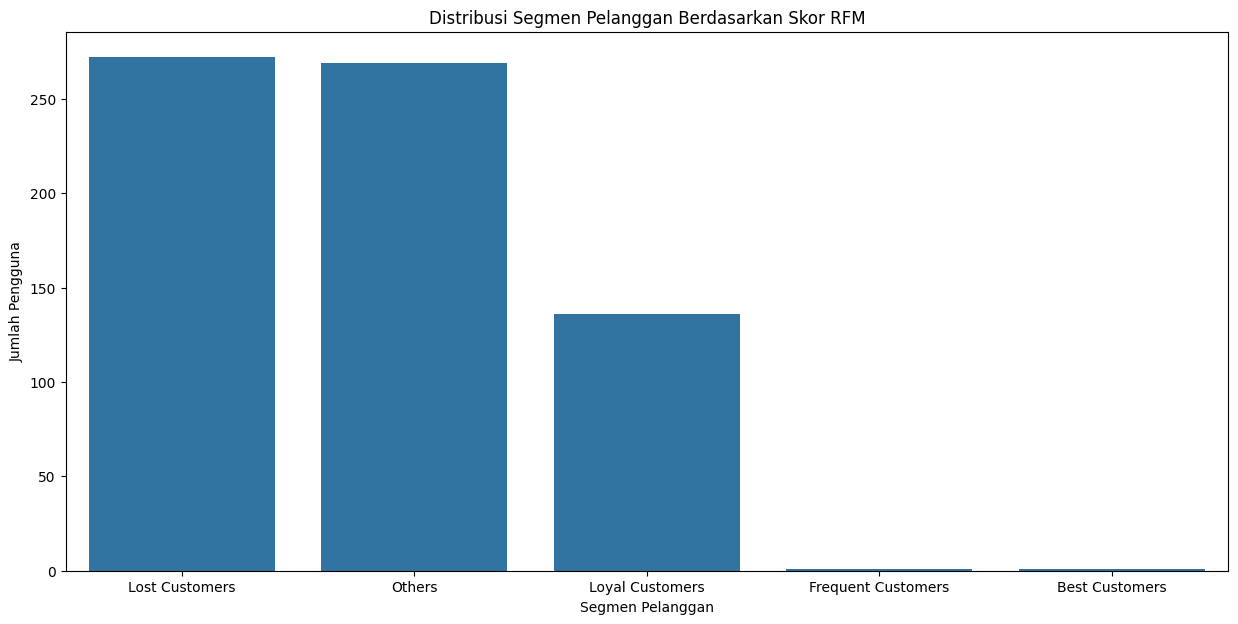

   registered  frequency  monetary  recency R_score F_score M_score RFM_Score  \
0          20          1        22      730       1       1       1       111   
1         416          1       431      729       1       1       1       111   
2         432          1       441      728       1       1       1       111   
3         451          1       754      698       1       1       1       111   
4         472          1       506      725       1       1       1       111   

          Segment  
0  Lost Customers  
1  Lost Customers  
2  Lost Customers  
3  Lost Customers  
4  Lost Customers  


In [12]:
# Menghitung Recency, Frequency, dan Monetary
# 1. Menghitung Recency berdasarkan tanggal terakhir setiap pengguna terdaftar melakukan peminjaman
data['last_day'] = data.groupby('registered')['dteday'].transform('max')

# 2. Frequency: Menghitung total jumlah peminjaman yang dilakukan setiap pengguna terdaftar
frequency = data.groupby('registered')['cnt'].count().reset_index()
frequency.columns = ['registered', 'frequency']

# 3. Monetary: Menghitung total jumlah sepeda yang dipinjam (cnt) oleh setiap pengguna terdaftar
monetary = data.groupby('registered')['cnt'].sum().reset_index()
monetary.columns = ['registered', 'monetary']

# Menggabungkan Recency, Frequency, dan Monetary ke dalam satu DataFrame
rfm = pd.merge(frequency, monetary, on='registered')

# 4. Menghitung Recency (selisih hari dari hari terakhir peminjaman hingga hari analisis)
recent_date = data['dteday'].max()
rfm['recency'] = (recent_date - data['last_day']).dt.days

# 5. Memberikan Skor untuk RFM (1-5) untuk masing-masing metrik
# Menggunakan pd.cut untuk menghindari masalah dengan qcut
# Menentukan bin untuk frequency dan monetary
rfm['R_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Untuk Frequency dan Monetary, jika tidak cukup unique value, kita gunakan pd.cut
frequency_bins = pd.cut(rfm['frequency'], bins=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['F_score'] = frequency_bins

monetary_bins = pd.cut(rfm['monetary'], bins=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_score'] = monetary_bins

# 6. Menggabungkan Skor RFM menjadi satu skor komposit
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# 7. Segmentasi berdasarkan RFM Score
def segment_rfm(df):
    if df['RFM_Score'] == '555':
        return 'Best Customers'
    elif df['R_score'] == 5:
        return 'Loyal Customers'
    elif df['R_score'] <= 2:
        return 'Lost Customers'
    elif df['F_score'] >= 4:
        return 'Frequent Customers'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_rfm, axis=1)

# Visualisasi Hasil RFM
plt.figure(figsize=(15, 7))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Distribusi Segmen Pelanggan Berdasarkan Skor RFM')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Menampilkan 5 baris pertama dari RFM untuk melihat hasilnya
print(rfm.head())



## Conclusion

- Penyewa kasual cenderung lebih aktif pada akhir pekan dibandingkan hari kerja sedangkan penyewa terdaftar memiliki pola peminjaman yang stabil sepanjang minggu.
- Suhu yang lebih tinggi dan cuaca cerah meningkatkan jumlah peminjaman, sedangkan cuaca buruk akan mengurangi aktivitas peminjaman.